In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from DA.preprocess import read_and_parse


In [2]:
folder = 'model/TA15/output'
total = 0
data = [[],[],[]]
for root, _, files in os.walk(folder):
        print(root)
        for file_ in files:
            if 'OUT0' in file_:
                total += 1   
                grid, ext_B, _, field, magn = read_and_parse(root+'/' + file_, True)                
                for i, comp in enumerate(ext_B):
                    data[i].append(comp)
                #    ext_ux[i], ext_uxx[i], ext_uxy[i] = accumulate_values(comp, ext_ux[i], ext_uxx[i], ext_uxy[i], x, y)
                #magn_ux, magn_uxx, magn_uxy = accumulate_values(magn[0], magn_ux, magn_uxx, magn_uxy, x, y)

model/TA15/output
Parsed model/TA15/output/OUT00.DAT
Parsed model/TA15/output/OUT01.DAT
Parsed model/TA15/output/OUT02.DAT
Parsed model/TA15/output/OUT03.DAT
Parsed model/TA15/output/OUT04.DAT
Parsed model/TA15/output/OUT05.DAT
Parsed model/TA15/output/OUT06.DAT
Parsed model/TA15/output/OUT07.DAT
Parsed model/TA15/output/OUT08.DAT
Parsed model/TA15/output/OUT09.DAT


In [3]:
def shifted_data_variance(data):
    if len(data) < 2:
        return 0.0
    K = data[0]
    n = Ex = Ex2 = 0.0
    for x in data:
        n = n + 1
        Ex += x - K
        Ex2 += np.multiply((x - K),(x - K))
    variance = (Ex2 - np.multiply(Ex, Ex)/n)/(n - 1)
    # use n instead of (n-1) if want to compute the exact variance of the given data
    # use (n-1) if data are samples of a larger population
    return variance

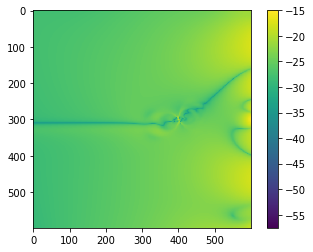

In [4]:
var = shifted_data_variance(data[0])
newv = np.where(var < 0, np.inf, var)
nvar = np.where(var == 0, 10e-26, var)
lvar = np.log(nvar)
b = plt.imshow(lvar)
plt.colorbar(b)

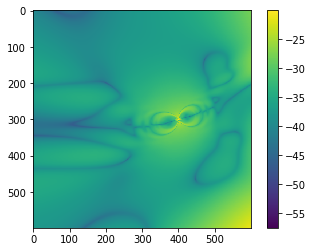

In [5]:
var = shifted_data_variance(data[1])
newv = np.where(var < 0, np.inf, var)
nvar = np.where(var == 0, 10e-26, var)
lvar = np.log(nvar)
b = plt.imshow(lvar)
plt.colorbar(b)

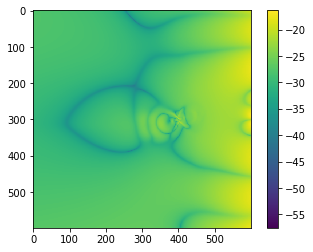

In [6]:
var = shifted_data_variance(data[2])
newv = np.where(var < 0, np.inf, var)
nvar = np.where(var == 0, 10e-26, var)
lvar = np.log(nvar)
b = plt.imshow(lvar)
plt.colorbar(b)